<a href="https://colab.research.google.com/github/riddhigarg2605/Intro-to-Data-analytics/blob/main/IDA_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns 
url = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
cars = pd.read_csv(url)
print(cars)

                  model   mpg  cyl   disp   hp  ...   qsec  vs  am  gear  carb
0             Mazda RX4  21.0    6  160.0  110  ...  16.46   0   1     4     4
1         Mazda RX4 Wag  21.0    6  160.0  110  ...  17.02   0   1     4     4
2            Datsun 710  22.8    4  108.0   93  ...  18.61   1   1     4     1
3        Hornet 4 Drive  21.4    6  258.0  110  ...  19.44   1   0     3     1
4     Hornet Sportabout  18.7    8  360.0  175  ...  17.02   0   0     3     2
5               Valiant  18.1    6  225.0  105  ...  20.22   1   0     3     1
6            Duster 360  14.3    8  360.0  245  ...  15.84   0   0     3     4
7             Merc 240D  24.4    4  146.7   62  ...  20.00   1   0     4     2
8              Merc 230  22.8    4  140.8   95  ...  22.90   1   0     4     2
9              Merc 280  19.2    6  167.6  123  ...  18.30   1   0     4     4
10            Merc 280C  17.8    6  167.6  123  ...  18.90   1   0     4     4
11           Merc 450SE  16.4    8  275.8  180  ... 

In [ ]:
#Q1 

maxmpgIndex = cars['mpg'].idxmax()
maxmpg = cars['mpg'].max()
print(maxmpgIndex) 
print(cars['model'].iloc[maxmpgIndex])
print (maxmpg)

19
Toyota Corolla
33.9


In [ ]:
minmpgIndex = cars['mpg'].idxmin()
print(minmpgIndex) 
minmpg = cars['mpg'].min()
print(cars['model'].iloc[minmpgIndex])
print(minmpg)

14
Cadillac Fleetwood
10.4


In [ ]:
#This implies that Toyota Corolla (at index 19) has the best mpg and Cadillac fleetwood (at index 14) has the least mpg

In [ ]:
#Q2

minhpIndex = cars['hp'].idxmin()
print(minhpIndex)
print(cars['model'].iloc[minhpIndex])
minhp = cars['hp'].min()
print(minhp)

18
Honda Civic
52


In [ ]:
maxqsecIndex = cars['qsec'].idxmax()
maxqsec = cars['qsec'].max()
print(maxqsecIndex) 
print(cars['model'].iloc[maxqsecIndex])
print (maxqsec)

8
Merc 230
22.9


In [ ]:
#This implies that Honda Civic (at index 18) has the worst horspower and Merc 230 (at index 8) has the best qsec

In [ ]:
from numpy import percentile

In [ ]:
#Q3

quartiles = percentile(cars.disp, [25, 50, 75])
print(quartiles)

[120.825 196.3   326.   ]


In [ ]:
data_min, data_max = cars.disp.min(), cars.disp.max()
print(data_min)
print(data_max)

71.1
472.0


In [ ]:
#printing the five number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median (Q2): %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 71.100
Q1: 120.825
Median (Q2): 196.300
Q3: 326.000
Max: 472.000


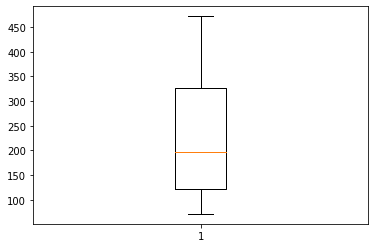

In [ ]:
plt.boxplot(cars.disp)
plt.show()

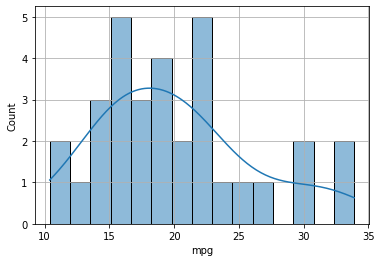

In [ ]:
#Q4

plt.grid(True)
sns.histplot(cars.mpg, bins = 15, kde = True)
plt.show()

In [ ]:
#This distribution shows that the most cars have mpg between 15-20, least number of cars have their mpg from 25-30.
#Since the plot resembles the shape of standard deviation, 15-20 can act as the mean value

In [ ]:
#Q5 

#in am column, 0 implies automatic and 1 implies manual 
mpg_automatic = cars['mpg'].loc[cars['am'] ==0 ]
avgmpg_automatic = mpg_automatic.mean()
print('avg mpg for automatic cars: %.3f' %avgmpg_automatic)


avg mpg for automatic cars: 17.147


In [ ]:
mpg_manual = cars['mpg'].loc[cars['am'] ==1 ]
avgmpg_manual = mpg_manual.mean()
print('avg mpg for manual cars: %.3f' %avgmpg_manual)

avg mpg for manual cars: 24.392


In [ ]:
#average mpg for automatic cars is 17.147 and for manual ones it is 24.392

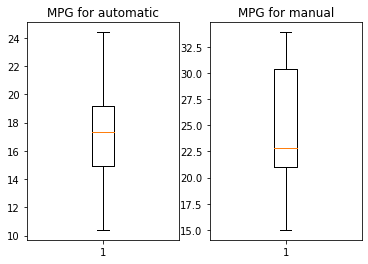

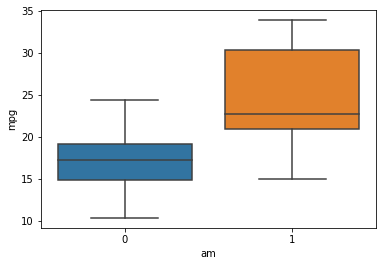

In [ ]:
#Q6

plt.subplot(1, 2, 1)
plt.boxplot(mpg_automatic)
plt.title('MPG for automatic')
plt.subplot(1, 2, 2)
plt.boxplot(mpg_manual)
plt.title('MPG for manual')
plt.show()
sns.boxplot(x = 'am', y = 'mpg', data = cars)
plt.show()

In [ ]:
#It can be seen that the average fuel efficiency for manually driven cars is higher than that of automatic ones.
#However the minimum and maximumn score has a higher range in manual than automatic
#Manual distribution has a positive skew because (quartile 3 - quartile 2) > (quartile 2 - quartile 1)
#Automatic has a lower median and a slightly negative skew because (quartile 3 - quartile 2) < (quartile 2 - quartile 1)

Text(0, 0.5, 'mpg')

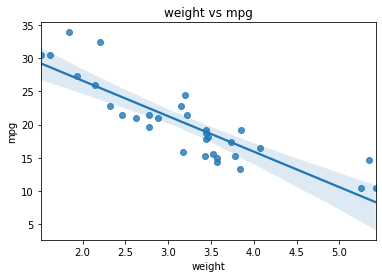

In [ ]:
#Q7

x = cars.wt
y = cars.mpg
sns.regplot(x=x,y=y)
plt.title('weight vs mpg')
plt.xlabel('weight')
plt.ylabel('mpg')

In [ ]:
#From the scatter plot, it can be seen that as the weight increases, mpg decreases and vice-versa.
# They have an inversely proportional relationship with each other 

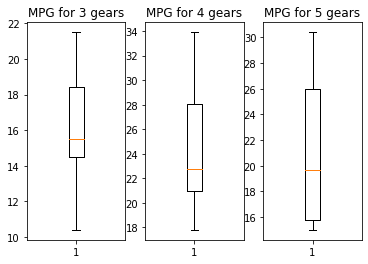

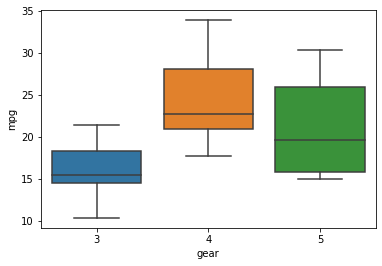

In [ ]:
#Q8

mpg_gears3 = cars['mpg'].loc[cars['gear'] ==3 ]
mpg_gears4 = cars['mpg'].loc[cars['gear'] ==4 ]
mpg_gears5 = cars['mpg'].loc[cars['gear'] ==5 ]
plt.subplot(1, 3, 1)
plt.boxplot(mpg_gears3)
plt.title('MPG for 3 gears')
plt.subplot(1, 3, 2)
plt.boxplot(mpg_gears4)
plt.title('MPG for 4 gears')
plt.subplot(1, 3, 3)
plt.boxplot(mpg_gears5)
plt.title('MPG for 5 gears')
plt.show()
sns.boxplot(x = 'gear', y = 'mpg', data = cars)
plt.show()

In [ ]:
#MPG for 3 gears has the lowest median
#MPG for all the gears seem positively skewed since (quartile 3 - quartile 2) > (quartile 2 - quartile 1)
#MPG for 4 gears has the highest data range and highest median

In [ ]:
#Q9

crosstab = pd.crosstab(cars.hp, cars.cyl)
print(crosstab)

cyl  4  6  8
hp          
52   1  0  0
62   1  0  0
65   1  0  0
66   2  0  0
91   1  0  0
93   1  0  0
95   1  0  0
97   1  0  0
105  0  1  0
109  1  0  0
110  0  3  0
113  1  0  0
123  0  2  0
150  0  0  2
175  0  1  2
180  0  0  3
205  0  0  1
215  0  0  1
230  0  0  1
245  0  0  2
264  0  0  1
335  0  0  1


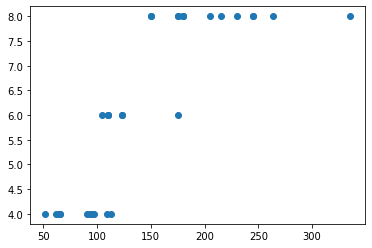

In [ ]:
plt.scatter(cars.hp, cars.cyl)
plt.show()

In [ ]:
#It can be seen that if there are 4 cylinders, horsepower is least, and it's maximum for 8 cylinders
#The two attributes have a directly proportional relationship

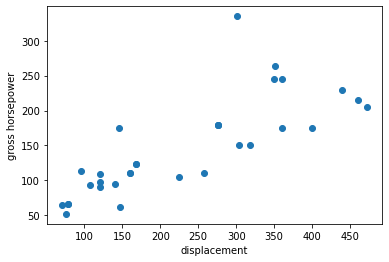

In [ ]:
#Q10

plt.scatter(cars.disp, cars.hp)
plt.ylabel('gross horsepower')
plt.xlabel('displacement')
plt.show()

In [ ]:
#finding the correlation coefficient
corr, _ = pearsonr(cars.disp, cars.hp)
print('correlation coefficient: %.3f' % corr)


correlation coefficient: 0.791


In [ ]:
#strength of linear relationship between the two attributes is 0.79 that is almost 80%
#Also a positive coefficient indicates that when the value of displacement increases, the value of hp also tends to increase and vice versa